In [87]:
import pandas as pd
import plotly.express as px

# Load your temperature change data
# Adjust the path to your actual file location
data = pd.read_csv('/all countries global temperature.csv')

# Select relevant columns and filter for the year 2020
data_2020 = data[['Country Name', '2020']].copy()
data_2020.columns = ['Country', 'Temperature Change']

# Create a choropleth map
fig = px.choropleth(
    data_frame=data_2020,
    locations='Country',  # Column with country names
    locationmode='country names',  # Use 'country names' for full names
    color='Temperature Change',  # Column with temperature change values
    color_continuous_scale='RdBu_r',  # Red to blue color scale
    title='Global Surface Temperature Change in 2020',
    labels={'Temperature Change': 'Temperature Change (°C)'},
    projection='natural earth',
    range_color=[-1.0, 2.0]  # Set the range for the color scale
)

# Show the plot
fig.show()


<ipython-input-88-576a843d77f2>:54: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



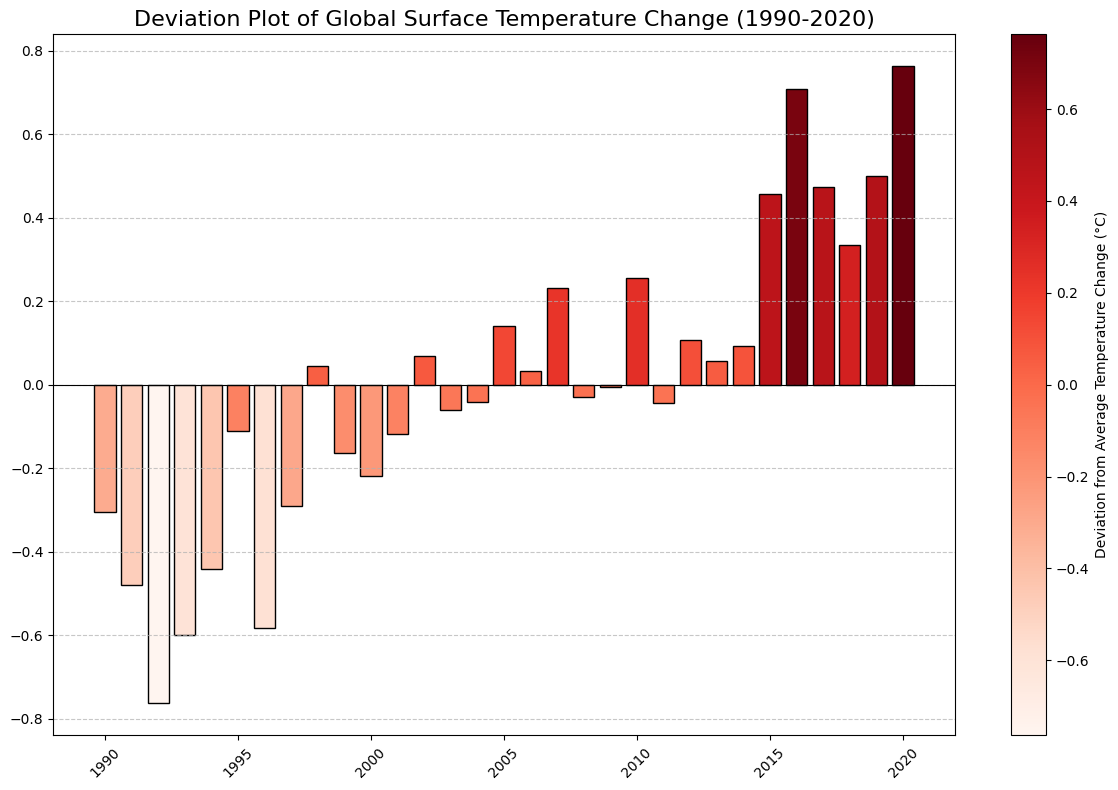

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Load your temperature change data
data = pd.read_csv('/all countries global temperature.csv')

# Filter the data for the 'World' entry
world_data = data[data['Country Name'] == 'World']

# Select the relevant columns (from 1990 to 2020)
years = [str(year) for year in range(1990, 2021)]
world_data = world_data[years].T

# Convert the index to integer (years) and reset index to use as a column
world_data = world_data.reset_index()
world_data.columns = ['Year', 'Temperature Change']

# Calculate the average temperature change
average_temp_change = world_data['Temperature Change'].mean()

# Calculate deviations from the average for each year
world_data['Deviation'] = world_data['Temperature Change'] - average_temp_change

# Create a colormap that transitions from light pink to dark red

cmap = plt.get_cmap('Reds')
norm = mcolors.Normalize(vmin=world_data['Deviation'].min(), vmax=world_data['Deviation'].max())

# Plotting the deviation plot
plt.figure(figsize=(12, 8))

# Plot each bar with a color based on its deviation value
for i, (year, deviation) in enumerate(zip(world_data['Year'], world_data['Deviation'])):
    plt.bar(year, deviation, color=cmap(norm(deviation)), edgecolor='black')

# Add horizontal line for zero
plt.axhline(0, color='black', linewidth=0.8)

# Set x-axis to display intervals of 5 years
plt.xticks(ticks=[str(year) for year in range(1990, 2021, 5)],
           labels=[str(year) for year in range(1990, 2021, 5)], rotation=45)

plt.title('Deviation Plot of Global Surface Temperature Change (1990-2020)', fontsize=16)

#plt.ylabel('Deviation from Average Temperature Change (°C)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add a colorbar to show the color scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Deviation from Average Temperature Change (°C)')

plt.show()


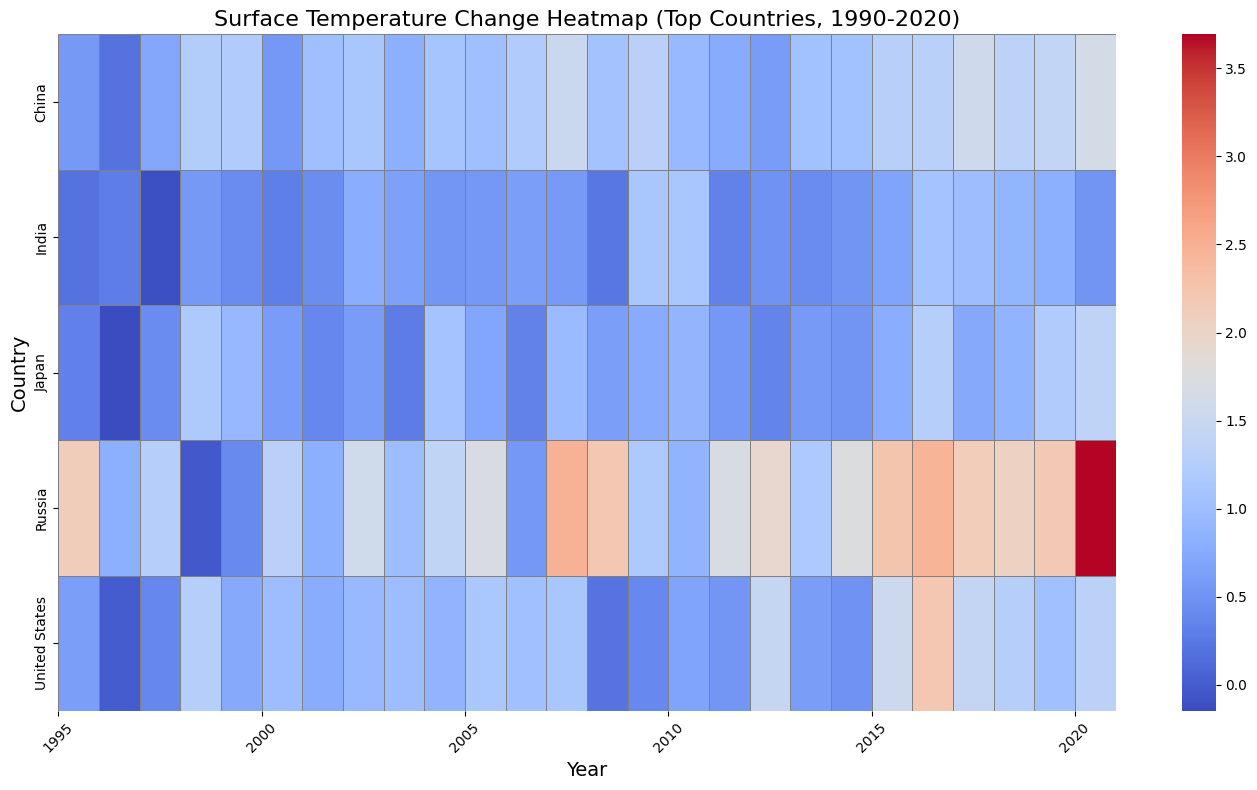

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your temperature change data
data = pd.read_csv('/all countries global temperature.csv')

# Define the list of top countries (modify if necessary)
top_countries = ['China, P.R.: Mainland', 'United States', 'India', 'European Union (27)', 'Russian Federation', 'Japan']

# Filter the data for the top countries
top_10_data = data[data['Country Name'].isin(top_countries)]

# Select relevant columns and rename them
years = [str(year) for year in range(1995, 2021)]
top_10_data = top_10_data[['Country Name'] + years]

# Rename columns for clarity
top_10_data.columns = ['Country'] + years

top_10_data['Country'] = top_10_data['Country'].replace('China, P.R.: Mainland', 'China')
top_10_data['Country'] = top_10_data['Country'].replace('Russian Federation', 'Russia')

# Convert all temperature change columns to numeric
for year in years:
    top_10_data[year] = pd.to_numeric(top_10_data[year], errors='coerce')

# Set the 'Country' column as the index
heatmap_data = top_10_data.set_index('Country')

# Plotting heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Surface Temperature Change Heatmap (Top Countries, 1990-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Setting x-axis ticks at intervals of 5 years
years_to_display = ['1995', '2000', '2005', '2010', '2015', '2020']
plt.xticks(ticks=[years.index(year) for year in years_to_display], labels=years_to_display, rotation=45)

plt.tight_layout()
plt.show()
